In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

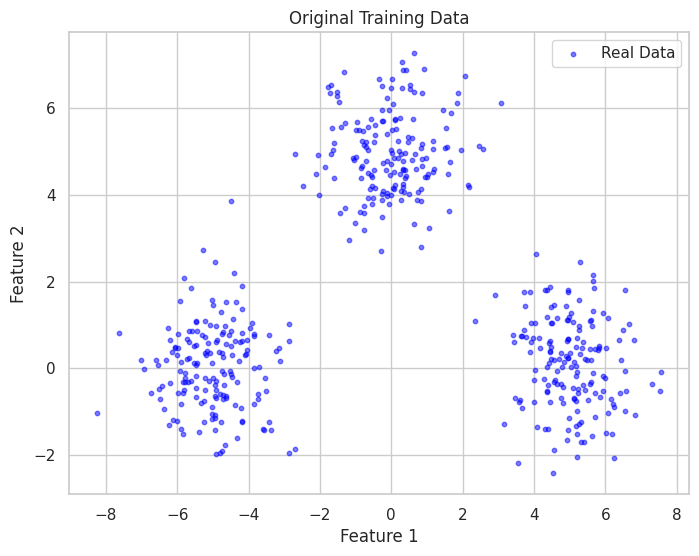

In [2]:
# 1. Generate synthetic data (3 distinct clusters)
n_samples = 500
centers = [[-5, 0], [0, 5], [5, 0]]
X_train, y_train = make_blobs(n_samples=n_samples, centers=centers, cluster_std=1.0, random_state=42)

# 2. Visualize the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=10, alpha=0.5, label='Real Data')
plt.title("Original Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [3]:
# 1. Initialize the GMM with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)

# 2. Fit the model to the data (The AI "learns" the shape of the data)
gmm.fit(X_train)

# 3. Print the learned parameters
print("Learned Means of the Clusters:\n", gmm.means_)
print("\nLearned Covariances (Spread) of the Clusters:\n", gmm.covariances_)
print("\nWeights of each cluster:\n", gmm.weights_)

Learned Means of the Clusters:
 [[-0.01588826  4.95954515]
 [ 5.02492302  0.11133172]
 [-5.0025576   0.03026412]]

Learned Covariances (Spread) of the Clusters:
 [[[ 1.10622599  0.06022359]
  [ 0.06022359  0.90561552]]

 [[ 0.81450182 -0.12831552]
  [-0.12831552  1.0649979 ]]

 [[ 0.8954043  -0.00851397]
  [-0.00851397  0.95283496]]]

Weights of each cluster:
 [0.33430527 0.33199655 0.33369818]


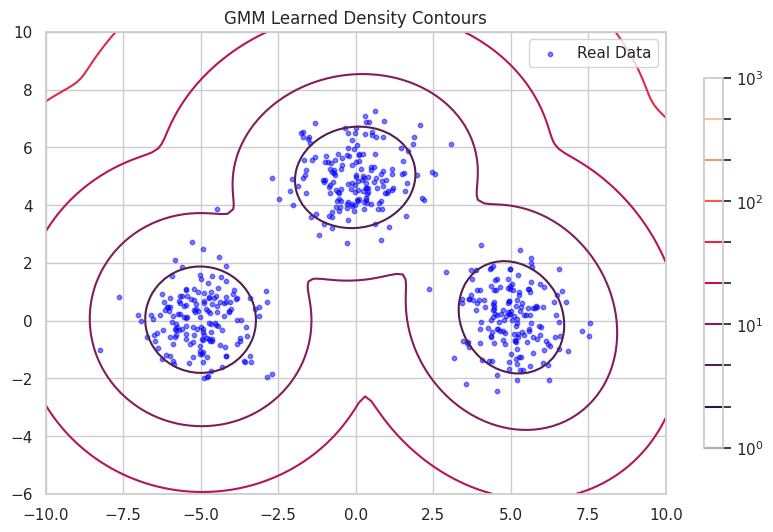

In [5]:
# Function to visualize decision boundaries and density
from matplotlib.colors import LogNorm

def plot_gmm(gmm, X):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-6, 10, 100)
    X_grid, Y_grid = np.meshgrid(x, y)
    XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T

    # Score_samples returns the log-likelihood of the samples
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X_grid.shape)

    plt.figure(figsize=(10, 6))

    # Plot contours
    CS = plt.contour(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
    plt.colorbar(CS, shrink=0.8, extend='both')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c='blue', s=10, alpha=0.5, label='Real Data')
    plt.title('GMM Learned Density Contours')
    plt.legend()
    plt.show()

plot_gmm(gmm, X_train)

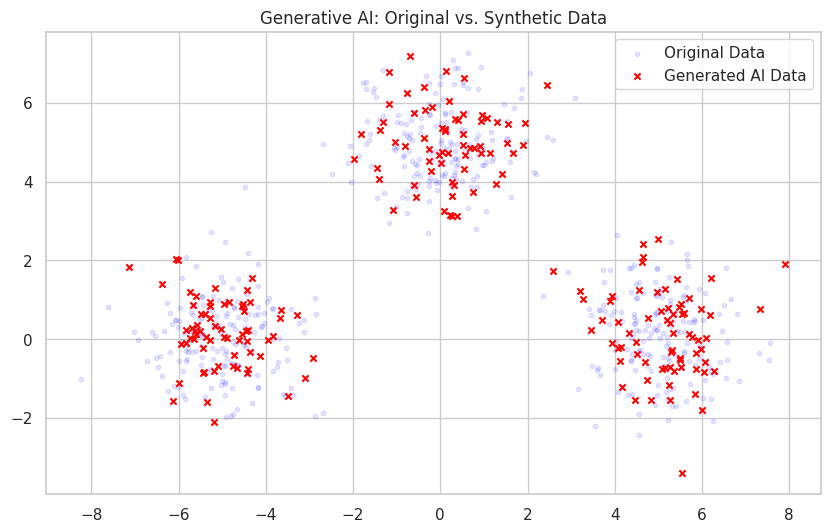

In [6]:
# 1. Generate 200 NEW synthetic data points
X_new, y_new = gmm.sample(200)

# 2. Visualize Original vs Generated Data
plt.figure(figsize=(10, 6))

# Plot Original Data (faded)
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=10, alpha=0.1, label='Original Data')

# Plot Generated Data (distinct)
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', s=20, marker='x', label='Generated AI Data')

plt.title("Generative AI: Original vs. Synthetic Data")
plt.legend()
plt.show()